In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re 
import os
import datetime
from bs4 import BeautifulSoup
#import tweepy 
#from tweepy import OAuthHandler
import requests
import json
from scipy import stats
from timeit import default_timer as timer
%matplotlib inline

# Gather Data

In [2]:
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = 'image-predictions.tsv'
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as file:
        file.write(response.content)

In [4]:
image_predictions_df = pd.read_csv("image-predictions.tsv",sep='\t')

In [5]:
twitter_df_list = []
with open('tweet-json.txt','r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_followers_count = tweet['user']['followers_count']
        twitter_df_list.append({
            'tweet_id':tweet_id,
            'retweet_count':retweet_count,
            'favorite_count': fav_count,
            'user_followers_count':user_followers_count
        })
        
api_df = pd.DataFrame(twitter_df_list)
       
    

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

# Assess Data

In [6]:
api_df.sample(10)

,tweet_id,retweet_count,favorite_count,user_followers_count
2333,666287406224695296,71,152,3201018
1111,733109485275860992,17621,44619,3200944
1890,674754018082705410,488,1456,3201004
972,750056684286914561,1011,3444,3200943
1843,675845657354215424,1000,2477,3201002
1814,676606785097199616,490,2039,3201002
482,814986499976527872,1505,8485,3200895
971,750071704093859840,3802,8653,3200943
2030,671763349865160704,999,1788,3201006
1143,727175381690781696,1540,4209,3200945


In [7]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   tweet_id              2354 non-null   int64
 1   retweet_count         2354 non-null   int64
 2   favorite_count        2354 non-null   int64
 3   user_followers_count  2354 non-null   int64
dtypes: int64(4)
memory usage: 73.7 KB


In [8]:
archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2250,667832474953625600,NaN,NaN,2015-11-20 22:30:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",THE EYES 12/10\n\nI'm sorry. These are suppose...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667832474...,12,10,None,None,None,None,None
1184,718631497683582976,NaN,NaN,2016-04-09 02:47:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate marshmallows but this o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/718631497...,10,10,None,None,None,None,None
816,770787852854652928,NaN,NaN,2016-08-31 00:58:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winston. His tongue has gone rogue. Do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770787852...,10,10,Winston,None,None,None,None
1201,716447146686459905,NaN,NaN,2016-04-03 02:08:05 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,NaN,NaN,NaN,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,None,None,pupper,None
1601,686003207160610816,NaN,NaN,2016-01-10 01:54:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hammond. He's a peculiar pup. Loves lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686003207...,3,10,Hammond,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
1832,676191832485810177,NaN,NaN,2015-12-14 00:07:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups just met and have instantly bon...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676191832...,10,10,None,None,None,None,None
1054,742423170473463808,NaN,NaN,2016-06-13 18:27:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bell. She likes holding hands. 12/10 w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742423170...,12,10,Bell,None,None,None,None
1771,678334497360859136,NaN,NaN,2015-12-19 22:02:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rosie. She has a snazzy bow tie and a ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678334497...,10,10,Rosie,None,None,None,None
641,793226087023144960,NaN,NaN,2016-10-31 23:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Juno. She spooked me up real good, but...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/793226087...,11,10,Juno,None,None,None,None


In [9]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
archive_df.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Clybe        1
Tessa        1
Stu          1
Crimson      1
by           1
Name: name, Length: 957, dtype: int64

In [12]:
archive_df.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [13]:
image_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Quality Issues:

### twitter archive table
- some names are uppercase and some are lowercase.
- some dogs have none as names.
- tweet_id should be string not int.
- source column contains whole html element instead of source name only.
- tweets with expanded_urls value of null should be removed.
- rating_numerator, rating_denominator are int when they should be floats.
- timestamp is string not datetime.
- retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp all mostly nulls so should be removed.
- in_reply_to_status_id, in_reply_to_user_id are mostly nulls so should be removed.
    
### image_predictions table
- tweet_id should be string not int.
- change jpg_url column name to image_url

### api_df table
- tweet_id should be string not int

## Tidiness Issues:

### twitter archive table
- four dogs columns should be combined into one.
    
### master dataset
- all three tables contain related information, therefore, they should be combined into one table.


# Clean Data

In [15]:
archive_df_copy = archive_df.copy()
image_predictions_df_copy = image_predictions_df.copy()
api_df_copy = api_df.copy()

## Fixing Quality Issues

### Define
- in api_df change tweet_id from int to string

### Code

In [16]:
api_df_copy.tweet_id = api_df_copy.tweet_id.astype(str)

### Test

In [17]:
api_df_copy.tweet_id.dtype

dtype('O')

### Define
- in twitter archive table , change tweet_id from int to string.

### Code

In [18]:
archive_df_copy.tweet_id = archive_df_copy.tweet_id.astype(str)

### Test

In [19]:
archive_df_copy.tweet_id.dtype

dtype('O')

### Define
- make all dog names lowercase

### Code

In [20]:
archive_df_copy.name = archive_df_copy.name.str.lower()

### Test

In [21]:
archive_df_copy.name.value_counts()

none        745
a            55
charlie      12
oliver       11
lucy         11
           ... 
jaycob        1
chadrick      1
damon         1
bloo          1
by            1
Name: name, Length: 957, dtype: int64

### Define
- change all dog names that are none to np.nan.

### Code

In [22]:
archive_df_copy.name = archive_df_copy.name.replace('none',np.nan)

### Test

In [23]:
archive_df_copy.name.value_counts(dropna=False)

NaN        745
a           55
charlie     12
cooper      11
lucy        11
          ... 
blue         1
ralphie      1
cuddles      1
arnold       1
farfle       1
Name: name, Length: 957, dtype: int64

### Define
- make timestamp datatype datetime instead of string

### Code


In [24]:
archive_df_copy.timestamp = archive_df_copy.timestamp.astype('datetime64[ns]')

### Test

In [25]:
archive_df_copy.timestamp.dtype

dtype('<M8[ns]')

In [26]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Define
- make source column contain only the source name instead of the whole html element.

### Code

In [27]:
source_names=[]
for i in archive_df_copy.itertuples(): 
    soup = BeautifulSoup(i.source)
    source_names.append(soup.a.string)

In [28]:
archive_df_copy.source = source_names

### Test

In [29]:
archive_df_copy.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Define 
- remove retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id, in_reply_to_user_id columns

### Code

In [30]:
archive_df_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace=True) 

### Test

In [31]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2356 non-null   object        
 1   timestamp           2356 non-null   datetime64[ns]
 2   source              2356 non-null   object        
 3   text                2356 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2356 non-null   int64         
 6   rating_denominator  2356 non-null   int64         
 7   name                1611 non-null   object        
 8   doggo               2356 non-null   object        
 9   floofer             2356 non-null   object        
 10  pupper              2356 non-null   object        
 11  puppo               2356 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 221.0+ KB


In [32]:
archive_df_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,franklin,None,None,None,None


### Define
- drop tweets with null expanded_urls values.

### Code

In [33]:
archive_df_copy = archive_df_copy.dropna(subset=['expanded_urls'])

### Test

In [34]:
archive_df_copy.expanded_urls.isnull().sum()

0

In [35]:
archive_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2297 non-null   object        
 1   timestamp           2297 non-null   datetime64[ns]
 2   source              2297 non-null   object        
 3   text                2297 non-null   object        
 4   expanded_urls       2297 non-null   object        
 5   rating_numerator    2297 non-null   int64         
 6   rating_denominator  2297 non-null   int64         
 7   name                1611 non-null   object        
 8   doggo               2297 non-null   object        
 9   floofer             2297 non-null   object        
 10  pupper              2297 non-null   object        
 11  puppo               2297 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 233.3+ KB


### Define
- in image_predictions table, change tweet_id from int to string.

### Code

In [36]:
image_predictions_df_copy.tweet_id = image_predictions_df_copy.tweet_id.astype(str) 

### Test

In [37]:
image_predictions_df_copy.tweet_id.dtype

dtype('O')

### Define
- change jpg_url column name to image_url in image_predictions table

### Code

In [38]:
image_predictions_df_copy.rename(columns={'jpg_url':'image_url'},inplace=True)

### Test

In [39]:
image_predictions_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   2075 non-null   object 
 1   image_url  2075 non-null   object 
 2   img_num    2075 non-null   int64  
 3   p1         2075 non-null   object 
 4   p1_conf    2075 non-null   float64
 5   p1_dog     2075 non-null   bool   
 6   p2         2075 non-null   object 
 7   p2_conf    2075 non-null   float64
 8   p2_dog     2075 non-null   bool   
 9   p3         2075 non-null   object 
 10  p3_conf    2075 non-null   float64
 11  p3_dog     2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [40]:
image_predictions_df_copy.head()

,tweet_id,image_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define 
- change rating_numerator and rating_denominator from int to float.

In [41]:
archive_df_copy.rating_numerator = archive_df_copy.rating_numerator.astype(float)
archive_df_copy.rating_denominator = archive_df_copy.rating_denominator.astype(float)

### Test

In [42]:
archive_df_copy.rating_numerator.dtype

dtype('float64')

In [43]:
archive_df_copy.rating_denominator.dtype

dtype('float64')

## Fixing Tidiness Issues

### Define 
- merge all four dog stage columns together into one column (doggo , floofer, pupper, puppo ==> dog_stage)

### Code

In [44]:
archive_df_copy.doggo.replace('None', '', inplace=True)
archive_df_copy.floofer.replace('None', '', inplace=True)
archive_df_copy.pupper.replace('None', '', inplace=True)
archive_df_copy.puppo.replace('None', '', inplace=True)

In [45]:
archive_df_copy['dog_stage'] = archive_df_copy.doggo + archive_df_copy.floofer + archive_df_copy.pupper + archive_df_copy.puppo

In [46]:
archive_df_copy.loc[archive_df_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_df_copy.loc[archive_df_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_df_copy.loc[archive_df_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'
archive_df_copy.loc[archive_df_copy.dog_stage == '', 'dog_stage'] = np.nan

In [47]:
archive_df_copy.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test

In [48]:
archive_df_copy.dog_stage.value_counts(dropna=False)

NaN               1923
pupper             243
doggo               80
puppo               28
doggo, pupper       12
floofer              9
doggo, floofer       1
doggo, puppo         1
Name: dog_stage, dtype: int64

In [49]:
archive_df_copy.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
343,832040443403784192,2017-02-16 01:34:34,Twitter for iPhone,RT @dog_rates: This is Klein. These pics were ...,https://twitter.com/dog_rates/status/769940425...,12.0,10.0,klein,NaN
941,752932432744185856,2016-07-12 18:27:35,Vine - Make a Scene,This is Carl. He's very powerful. 12/10 don't ...,https://vine.co/v/OEppMFbejFz,12.0,10.0,carl,NaN
2316,666649482315059201,2015-11-17 16:09:56,Twitter for iPhone,Cool dog. Enjoys couch. Low monotone bark. Ver...,https://twitter.com/dog_rates/status/666649482...,4.0,10.0,NaN,NaN
669,790227638568808452,2016-10-23 16:25:25,Twitter for iPhone,RT @dog_rates: This is Leela. She's a Fetty Wo...,https://twitter.com/dog_rates/status/762699858...,11.0,10.0,leela,NaN
85,876120275196170240,2017-06-17 16:52:05,Twitter for iPhone,"Meet Venti, a seemingly caffeinated puppoccino...",https://twitter.com/dog_rates/status/876120275...,13.0,10.0,venti,NaN
1579,687312378585812992,2016-01-13 16:36:55,Twitter for iPhone,"""You got any games on your phone"" 7/10 for inv...",https://twitter.com/dog_rates/status/687312378...,7.0,10.0,NaN,pupper
1319,706516534877929472,2016-03-06 16:27:23,Twitter for iPhone,Please enjoy this pup in a cooler. Permanently...,https://twitter.com/dog_rates/status/706516534...,12.0,10.0,NaN,NaN
1928,674045139690631169,2015-12-08 01:57:39,Twitter for iPhone,Herd of wild dogs here. Not sure what they're ...,https://twitter.com/dog_rates/status/674045139...,3.0,10.0,NaN,NaN
2117,670421925039075328,2015-11-28 02:00:17,Twitter for iPhone,Meet Herb. 12/10 https://t.co/tLRyYvCci3,https://twitter.com/dog_rates/status/670421925...,12.0,10.0,herb,NaN
2276,667443425659232256,2015-11-19 20:44:47,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,10.0,NaN,NaN


### Define
- merge api_df , archive_df_copy , image_predictions_df_copy into one master table called twitter_archive_master_df

### Code

In [50]:
twitter_archive_master_df = pd.merge(archive_df_copy,image_predictions_df_copy,on='tweet_id',how='outer')
twitter_archive_master_df = pd.merge(twitter_archive_master_df,api_df_copy,on='tweet_id',how='outer')

### Test

In [51]:
twitter_archive_master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,image_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,user_followers_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,bagel,0.085851,False,banana,0.076110,False,8853.0,39467.0,3200889.0
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514.0,33819.0,3200889.0
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328.0,25461.0,3200889.0
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964.0,42908.0,3200889.0
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774.0,41048.0,3200889.0


In [52]:
twitter_archive_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tweet_id              2356 non-null   object        
 1   timestamp             2297 non-null   datetime64[ns]
 2   source                2297 non-null   object        
 3   text                  2297 non-null   object        
 4   expanded_urls         2297 non-null   object        
 5   rating_numerator      2297 non-null   float64       
 6   rating_denominator    2297 non-null   float64       
 7   name                  1611 non-null   object        
 8   dog_stage             374 non-null    object        
 9   image_url             2075 non-null   object        
 10  img_num               2075 non-null   float64       
 11  p1                    2075 non-null   object        
 12  p1_conf               2075 non-null   float64       
 13  p1_dog            

# Store clean data


In [53]:
twitter_archive_master_df.to_csv('twitter_archive_master.csv',index=False)
archive_df_copy.to_csv('twitter_archive_clean.csv',index=False)
image_predictions_df_copy.to_csv('image_predictions_clean.csv',index=False)

# Analyze clean data

## Insights and Visualization

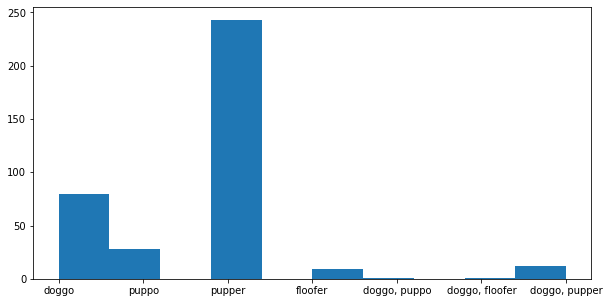

In [55]:
twitter_archive_master_df.dog_stage.hist(figsize=(10,5),grid=False);

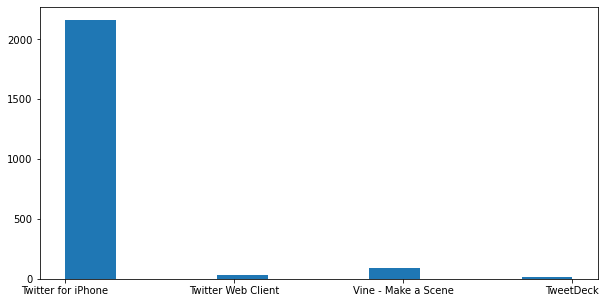

In [56]:
twitter_archive_master_df.source.hist(figsize=(10,5),grid=False);

In [57]:
image_df=image_predictions_df_copy.copy()
image_df.p1_dog=image_predictions_df_copy.p1_dog.astype(str)
image_df.p2_dog=image_predictions_df_copy.p2_dog.astype(str)
image_df.p3_dog=image_predictions_df_copy.p3_dog.astype(str)

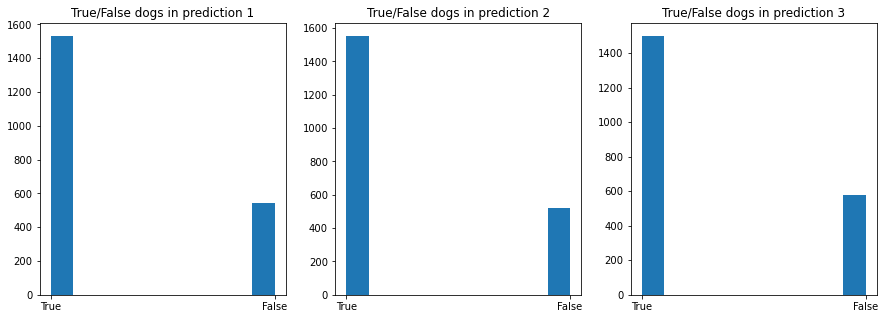

In [58]:
plt.subplot(1,3,1)
image_df.p1_dog.hist(grid=False,figsize=(15,5))
plt.title('True/False dogs in prediction 1')
plt.subplot(1,3,2)
image_df.p2_dog.hist(grid=False,figsize=(15,5))
plt.title('True/False dogs in prediction 2')
plt.subplot(1,3,3)
image_df.p3_dog.hist(grid=False,figsize=(15,5))
plt.title('True/False dogs in prediction 3');

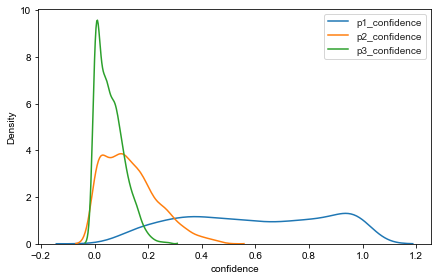

In [59]:
sns.distplot(image_df.p1_conf, kde=True, label='p1_confidence',hist=False);
sns.distplot(image_df.p2_conf, kde=True, label='p2_confidence',hist=False);
sns.distplot(image_df.p3_conf, kde=True, label='p3_confidence',hist=False);
sns.set_style("white")
plt.tight_layout()
plt.legend()
plt.xlabel('confidence')
plt.ylabel('Density')
plt.show() 